# The Report

# Münster: Energy and Greenhouse Gas Balance 1990 – 2021


## content:
1. Introduction.

2. Methods:

    2.1 Importing the required libraries and Loading the datasets.

    2.2 Processing.

    2.3 Integration.

3. Results.

4. Conclusion.

## 1. Introduction:


Münster, the city of science and learning, and Germany's Climate Protection Capital.

Achieving climate neutrality for the city of Münster is a very big challenge and requires a significant intensification and, above all, acceleration of the activities, measures and processes of all actors in the area of ​​climate protection.

The energy and climate protection assessment of Münster offers insights into the city's energy consumption and related greenhouse gas emissions. It records all sectors, including  transport, households, commerce, and industry. 

This report offers an in-depth analysis on both consumption and co2 emissions. Also it emphasizes the renewable energy production trends over time. Utilizing publicly available datasets from openopendata.stadt-muenster.de and the Python programming language to find out "How can Münster enhance its sustainable urban development strategies, focusing on reducing CO2 emissions and reinforcing renewable energy production?"

## 2. Methods: 


The analysis will focus on two key aspects: the development of annual CO2 emissions and the status of renewable electricity and heat production. The primary goal is to explore how promoting cleaner energy sources benefits the environment. 

The Work Packages: 

2.1. Loading the datasets into Pandas dataframe. 

2.2.  Processing: Clean, format, and prepare the dataset for analysis. This includes handling missing values, ensuring data consistency, and structuring the data for further investigation. 

2.3.  Integration: Develop a data integration plan to combine the renewable energy production dataset and CO2 emissions development.

#### 2.1. Importing the required libraries and Loading the datasets:



In [2]:
#!/usr/bin/env python3.11
# -*- coding: utf-8 -*-
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller


In [3]:
# Adjust display options for NumPy and pandas

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)


In [4]:
#print("Loadin Renewable Energy of the city of Münster in the years 1990-2020 data....")
#download data from here:https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls
renewable_energyـurl = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls" # 
renewable_energy = pd.read_excel(renewable_energyـurl, sheet_name=None)
  

#print("Loadin CO2 emissions of the city of Münster in the years 1990-2021 data....")
        #download data from here: https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls
co2_emissions_url = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls" # 
co2_emissions = pd.read_excel(co2_emissions_url, sheet_name=None) # to add all the three  sheets  into CO2emissions,  because it loads the first one by default.


### Renewable_energy dataset:

**Renewable energy** obtained from ever-replenishing resource such as the sun and wind. 

While Non-renewable energy derived from finite sources like coal and oil that may eventually be depleted.

The renewable_energy dataset contains the data on the production of **electricity** and **heat** through renewable energy resources in years 1990-2020 in the city of Münster. The main sources for renewable energy are:

Photovoltaik which involves converting sunlight into electricity.

<img src="/pictures/photovoltaik.jpeg" alt="Photovoltaik" width="400"/>

Wind power that harnesses the power of wind to generate electricity through turbines.

<img src="/pictures/windpark.jpeg" alt="windpark" width="400"/>

Hydropower utilizes the movement of water to generate electricity.

<img src="/pictures/wasserkraft-hauptbild.jpeg" alt="wasserkraft-hauptbild" width="400"/>

Sewage/landfill gas is the gas byproduct from sewage treatment and landfills.

<img src="/pictures/landfill.jpeg" alt="landfill" width="400"/>

Biomethan is methane derived from organic materials.

<img src="/pictures/Biogasanlage.jpeg" alt="Biogasanlage" width="350"/> <img src="/pictures/biomasse.jpeg" alt="biomasse" width="350"/>

Heat pumps are electrical devices transferring heat between locations.

<img src="/pictures/heatbump.jpeg" alt="heatbump" width="400"/>

Pellets are compressed wood chips used as a fuel source.

<img src="/pictures/wood.jpeg" alt="wood" width="400"/>   

Firewood refers to firewood that is cut and prepared in log form.

<img src="/pictures/firewood.jpeg" alt="firewood" width="400"/>   




### CO2  Emissions dataset:

**CO2 emission** is the production of carbon dioxide, which is a powerful greenhouse gas. It is produced by the burning of materials that contain carbon, such as wood, coal, diesel or gas.
Huge consumption of these materials means emitting  massive amounts of CO2 which leads to global warming.

The co2_emissions dataset contains insights about the **CO2 emissions** (final energy consumption) of the city of Münster in  years 1990-2021. It is divided into three sheets based on the sector (private households, industry, transport, commercial + other), application (heat, electricity, transport) or by energy source (natural gas, district heating, heating oil, coal, fuel mix, transport, electricity, other).


Now, let us have a close look into the datasets.

#### 2.2. Processing: 

Clean, format, and prepare the dataset for analysis. This includes handling missing values, ensuring data consistency, and structuring the data for further investigation. Then, initiate a data integration plan to combine the renewable energy production dataset and CO2 emissions development.

In [5]:
#### The first dataset renewable_energy 

renewable_energy_electricity = pd.read_excel(renewable_energyـurl, sheet_name=0) # the first sheet contains the data that describes the production of *electricity* through renewable energy.
renewable_energy_electricity= renewable_energy_electricity.rename(columns={'Erneuerbare Stromproduktion nach Technologie in (MWh)': 'year'} ) #rename for later merging   

renewable_energy_heat = pd.read_excel(renewable_energyـurl, sheet_name=1) #the second sheet contains the data that describes the production of *heat* through renewable energy.
renewable_energy_heat= renewable_energy_heat.rename(columns={'Erneuerbare Wärmeproduktion nach Technologie in (MWh)': 'year'} ) #rename for later merging   

# merge the data of the renewable_energy_electricity and renewable_energy_heat 
renewable_energy = pd.merge(renewable_energy_electricity, renewable_energy_heat,  on='year' ) #merge the two exel sheets into one datafram.

#rename and translate columns
renewable_energy.rename(columns={
    'year': 'year',
    'Photovoltaik': 'Photovoltaic',
    'Windkraft': 'Wind power',
    'Wasserkraft': 'Hydropower',
    'Biogasanlagen_x': 'Biogas plants in electricity',
    'Klär- / Deponiegas_x': 'Sewage / landfill gas in electricity',
    'Biomethan_x': 'Biomethane in electricity',
    'Gesamt EE': 'Total RE in electricity',
    'Solarthermie': 'Solar thermal',
    'Wärmepumpen': 'Heat pumps',
    'Pellets': 'Pellets',
    'Stückholz': 'Firewood',
    'Biogasanlagen_y': 'Biogas plants in heat',
    'Klär- / Deponiegas_y': 'Sewage / landfill gas in heat',
    'Biomethan_y': 'Biomethane in heat',
    'Gesamt': 'Total RE in heat',
}, inplace=True)

#Cleaning data and replacing missing values
renewable_energy.fillna(0, inplace=True)
renewable_energy['Total RE production'] = renewable_energy[['Total RE in electricity','Total RE in heat']].sum(axis=1) 

######################################### 

 

In [6]:
renewable_energy.head(15)

,year,Photovoltaic,Wind power,Hydropower,Biogas plants in electricity,Sewage / landfill gas in electricity,Biomethane in electricity,Total RE in electricity,Solar thermal,Heat pumps,Pellets,Firewood,Biogas plants in heat,Sewage / landfill gas in heat,Biomethane in heat,Total RE in heat,Total RE production
0,1990,0.00000,63.20,239.8,0.0,0.00,0,303.00000,24.840,42.96875,0.0,0.0,0.000,0.00,0,67.80875,370.80875
1,1995,28.01120,63.20,239.8,0.0,0.00,0,331.01120,349.140,195.31250,0.0,0.0,0.000,0.00,0,544.45250,875.46370
2,2000,482.53884,63.20,239.8,0.0,11850.00,0,12635.53884,1852.420,347.65625,12.5,0.0,0.000,15000.00,0,17212.57625,29848.11509
3,2005,2637.63906,21804.00,239.8,0.0,11850.00,0,36531.43906,4110.660,500.00000,487.5,495.0,1237.700,15000.00,0,21830.86000,58362.29906
4,2010,16953.45818,22815.20,436.0,16417.4,11850.00,0,68472.05818,8827.300,8277.50000,2712.5,2370.0,14649.420,15000.00,0,51836.72000,120308.77818
5,2015,36430.82880,34406.08,436.0,44952.2,12290.20,14816,143331.30880,10670.060,14890.00000,3812.5,3810.0,37828.736,7570.27,21963,100544.56600,243875.87480
6,2016,37358.18730,34456.64,436.0,44952.2,15708.24,23218,156129.26730,10944.818,15617.00000,3950.0,4033.8,37828.736,10762.24,31864,115000.59400,271129.86130
7,2017,39083.18440,55059.84,436.0,44952.2,15414.22,12059,167004.44440,11078.678,16492.00000,4075.0,4078.8,37828.736,8370.43,19457,101380.64400,268385.08840
8,2018,42910.06126,60545.60,436.0,44952.2,15617.32,20490,184951.18126,11217.598,17531.50000,4212.5,4168.2,37828.736,8043.99,26793,109795.52400,294746.70526
9,2019,47745.49056,60545.60,436.0,44952.2,15617.32,17479,186775.61056,11396.998,18731.50000,4275.0,4641.9,37828.736,7740.00,22673,107287.13400,294062.74456


In [7]:
renewable_energy.set_index('year', inplace=True)


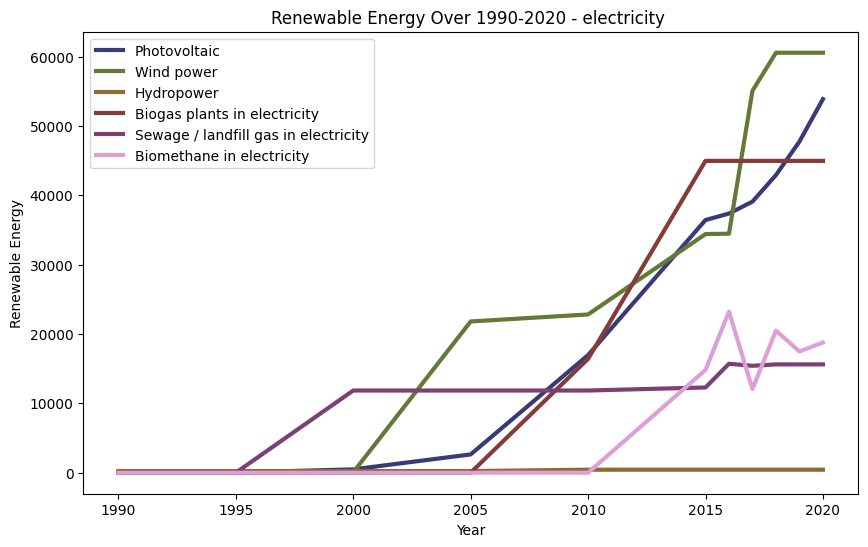

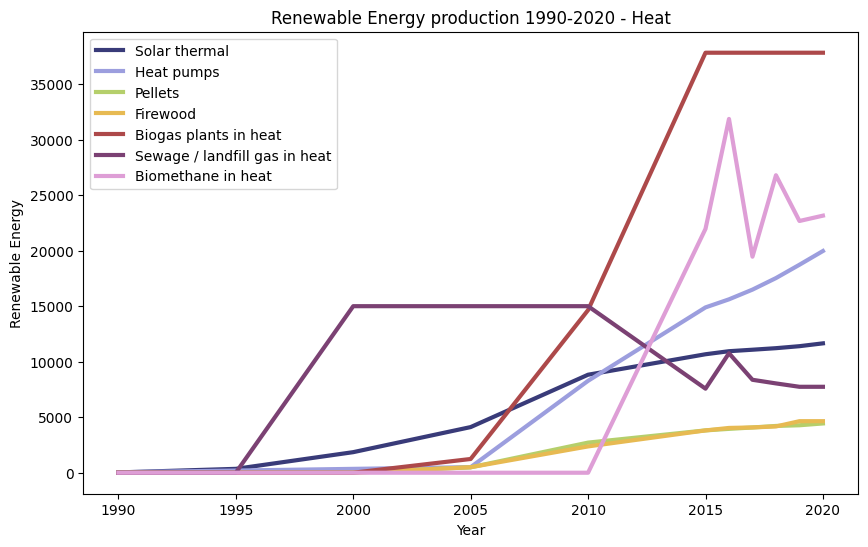

In [8]:

# plot  

#  The columns for the first and second pictures
columns_electricity = ['Photovoltaic', 'Wind power', 'Hydropower', 'Biogas plants in electricity',
                      'Sewage / landfill gas in electricity', 'Biomethane in electricity']

columns_heat = ['Solar thermal', 'Heat pumps', 'Pellets', 'Firewood',
                       'Biogas plants in heat', 'Sewage / landfill gas in heat', 'Biomethane in heat']

# Plotting the columns_electricity picture
renewable_energy[columns_electricity].plot(
    
    kind='line',
    figsize=(10, 6),
    colormap='tab20b',
    linewidth=3,
    title='Renewable Energy Over 1990-2020 - electricity ',
)

# Set labels
plt.xlabel('Year')
plt.ylabel('Renewable Energy')

# Show the first plot
plt.show()

# Plotting the columns_heat picture
renewable_energy[columns_heat].plot(
    kind='line' ,
    figsize=(10, 6),
    colormap='tab20b',
    linewidth=3,
    title='Renewable Energy production 1990-2020 - Heat',
)

# Set labels
plt.xlabel('Year')
plt.ylabel('Renewable Energy')

# Show the second plot
plt.show()



In [9]:
renewable_energy.reset_index('year', inplace=True)


In [10]:
#### The second dataset co2 emissions  


#store each sheet in a data frame >>>  then creat a new CO2emissions data frame from these data frames (merge them!):
co2_emissions_sectors  = pd.read_excel(co2_emissions_url, sheet_name=0) # the first sheet (at 0) define CO2emissions by sectors
co2_emissions_sectors =co2_emissions_sectors.rename(columns={'CO2-Emissionen nach Sektoren in (t)': 'year'} ) #rename the CO2-Emissionen nach Sektoren column into >>> year. This step for merge the two dataframes alnog the "year" column


co2_emissions_applications = pd.read_excel(co2_emissions_url, sheet_name=1)# the second sheet (at 1) define CO2emissions by application
co2_emissions_applications =co2_emissions_applications.rename(columns={'CO2-Emissionen nach Anwendungen in (kt)': 'year'} ) #rename the CO2-Emissionen nach Anwendungen column into >>> year 

# merge the data of the CO2emissions_sectors and CO2emissions_applications 
co2_emissions = pd.merge(co2_emissions_sectors, co2_emissions_applications,  on='year' ) #merge the two exel sheets into one datafram. cO2_emissions_applications.index.name = 'CO2 emissions according to applications in (KT)' # put the dataset topic in the first(index) column


### process the merged dataFrame CO2emissions   
co2_emissions.rename(columns={
    'year': 'year',
    'Private Haushalte': 'Private households',
    'Gewerbe + Sonstiges': 'Trade and others',
    'Industrie': 'Industry',
    'Verkehr_x':'Transport',
    'Wärme': 'Heat', # Kt >> convert to t!!
    'Strom': 'Electricity', # Kt!!
    'Gesamt_y': 'Total_co2', # Kt and update to the new values!!
    'Gesamt in % zu 1990': 'Total as of 1990'  # update to the new values!!
     }    ,inplace=True)


 # Drop the unnesseciry columns   columns 
co2_emissions = co2_emissions.drop(columns=[col for col in ['Verkehr in %', 'Gesamt_x', 'Wärme in %', 'Strom in %', 'Verkehr_y'] if col in co2_emissions.columns], axis=1)

co2_emissions['Heat']= co2_emissions['Heat']*1000
co2_emissions['Electricity'] = co2_emissions['Electricity']*1000
co2_emissions['Total_co2'] = co2_emissions.iloc[:, 1:-2].sum(axis=1)
co2_emissions['Total as of 1990'] = ((co2_emissions['Total_co2'] - co2_emissions['Total_co2'].iloc[0]) / co2_emissions['Total_co2'].iloc[0]) 


#Cleaning data and replacing missing values
co2_emissions.fillna(0, inplace=True)
#######################################################

In [11]:
co2_emissions.head(15)

,year,Private households,Trade and others,Industry,Transport,Heat,Electricity,Total_co2,Total as of 1990
0,1990,817146.280496,846374.365518,293939.743986,660748.806226,1.120973e+06,836487.800000,4.575670e+06,0.000000
1,1995,774039.745963,801725.975522,278433.678515,649866.500561,1.055941e+06,798258.216000,4.358265e+06,-0.047513
2,2000,773328.016727,800988.788810,278177.658859,638984.194897,1.058948e+06,793546.832000,4.343973e+06,-0.050637
3,2005,806450.639618,835296.157763,290092.361925,628101.889233,9.614061e+05,970433.036634,4.491780e+06,-0.018334
4,2010,684161.375550,735889.940880,185496.828653,622684.731430,7.880783e+05,817469.875512,3.833781e+06,-0.162138
5,2015,636894.098977,629441.403926,217637.183252,596134.946082,7.446007e+05,739371.946216,3.564080e+06,-0.221080
6,2016,607277.947909,632025.211201,214250.898995,598972.703684,7.553259e+05,698228.112507,3.506081e+06,-0.233756
7,2017,578793.984793,623804.379543,215604.505102,593667.548910,7.686083e+05,649594.561599,3.430073e+06,-0.250367
8,2018,588419.949975,592654.296510,232468.641927,588925.588842,7.778818e+05,635661.057120,3.416011e+06,-0.253440
9,2019,533848.636234,549176.926239,225833.358416,582527.299609,7.073147e+05,601544.172097,3.200245e+06,-0.300595


In [12]:
co2_emissions.set_index('year' , inplace=True)


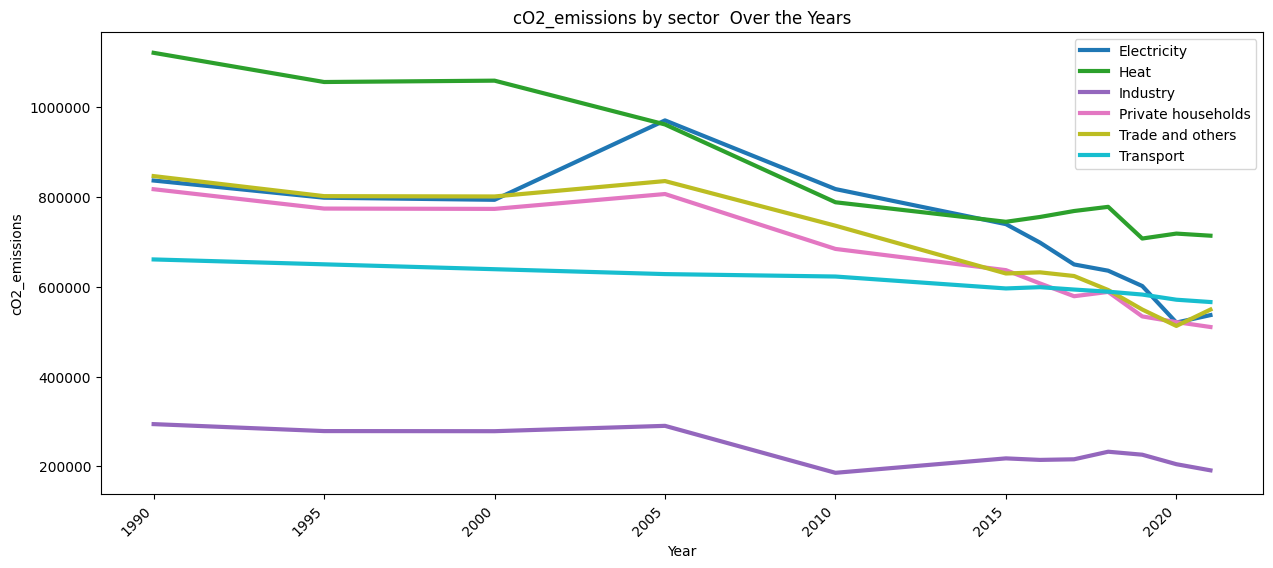

In [13]:
# Plotting
exclude = ['Total_co2',	'Total as of 1990']

co2_emissions.loc[:, co2_emissions.columns.difference(exclude)].plot(
    kind='line',
    figsize=(15, 6),
    colormap='tab10',
    linewidth=3,
    title='cO2_emissions by sector  Over the Years',
)

# Set labels
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment for clear representation

plt.ylabel('cO2_emissions')
plt.ticklabel_format(axis='y', style='plain')
# Show the plot
plt.show()

In [14]:
co2_emissions.reset_index('year' , inplace=True)


This dataset contains the CO2 emissions by energy source and sector for 2021.

In [20]:
 #### THe third dataset co2 emissions by energy source

co2_by_energy_source = pd.read_excel(co2_emissions_url, sheet_name=2)# the third sheet (at 2) define CO2emissions by energy source

#rename and translate the columns 
column_mapping = {
    'CO2 Emissionen nach Energieträgern und Sektoren in 2021 in (t)':"CO2 Emissions by Energy Source and Sector (2021)",
    'Erdgas': 'Natural Gas',
    'Fernwärme': 'District Heating',
    'Heizöl': 'Heating Oil',
    'EE Wärme': 'Renewable Heat',
    'Kraftstoffmix Verkehr': 'Fuel Mix Traffic',
    'Strom': 'Electricity',
    'Summe': 'Total',
    'Anteil': 'Share'
}
# Rename columns
co2_by_energy_source.rename(columns=column_mapping, inplace=True)
co2_by_energy_source.set_index('CO2 Emissions by Energy Source and Sector (2021)', inplace=True)

# rename and translate the rows 
index_mapping = {
    'Private Haushalte': 'Private households',
    'Gewerbe+Sonstiges': 'Trade+Other',
    'Industrie': 'Industry',
    'Verkehr': 'Traffic',
    'Summe': 'Total',
    'Anteil': 'Share'
}

# Rename index (rows)
co2_by_energy_source.rename(index=index_mapping, inplace=True)


#Cleaning data and replacing missing values
co2_by_energy_source.fillna(0, inplace=True)



In [21]:
co2_by_energy_source

,Natural Gas,District Heating,Heating Oil,Renewable Heat,Fuel Mix Traffic,Electricity,Total,Share
CO2 Emissions by Energy Source and Sector (2021),,,,,,,,
Private households,238981.296226,11415.403694,98807.497200,1052.187099,0.000000,159997.920038,5.102543e+05,0.280946
Trade+Other,120189.234076,85194.803281,36684.480000,348.860810,0.000000,306686.890631,5.491043e+05,0.302337
Industry,107276.177189,0.000000,1630.827765,0.000000,0.000000,82073.433626,1.909804e+05,0.105154
Traffic,0.000000,0.000000,0.000000,0.000000,549780.000000,16082.000000,5.658620e+05,0.311564
Total,466446.707492,96610.206975,137122.804965,1401.047909,549780.000000,564840.244295,1.816201e+06,1
Share,0.256825,0.053194,0.075500,0.000771,0.302709,0.311001,1.000000e+00,-


### 2.3. Integration

To store the data in a structured and organized way which make the data more efficient to work with and
more portable.

In [ ]:
#Creating SQLite files
print("Creating CO2 Emissions Energy and Renewable Energy SQLite files: ")
sqlite_path = '../data/co2_emissions_renewable_energy.sqlite'
engine = create_engine(f'sqlite:///{sqlite_path}')

print("creating CO2 Emissions data table ...")
co2_emissions.to_sql("co2_emissions_table", engine, if_exists='replace', index=False)
   
     
print("creating Renewable Energy data table...")
renewable_energy.to_sql("renewable_energy_table", engine ,if_exists='replace', index=False)

print("creating CO2 Emissions by Energy Source data table...")
co2_emissions_energy_source.to_sql("co2_emissions_energy_source_table", engine ,if_exists='replace', index=True)# index=True

 
    
print("SQLite files created successfully!!!")

### 3. Results:


Insights about the trends and patterns. What is the relationships between renewable energy production and CO2 emissions development? 



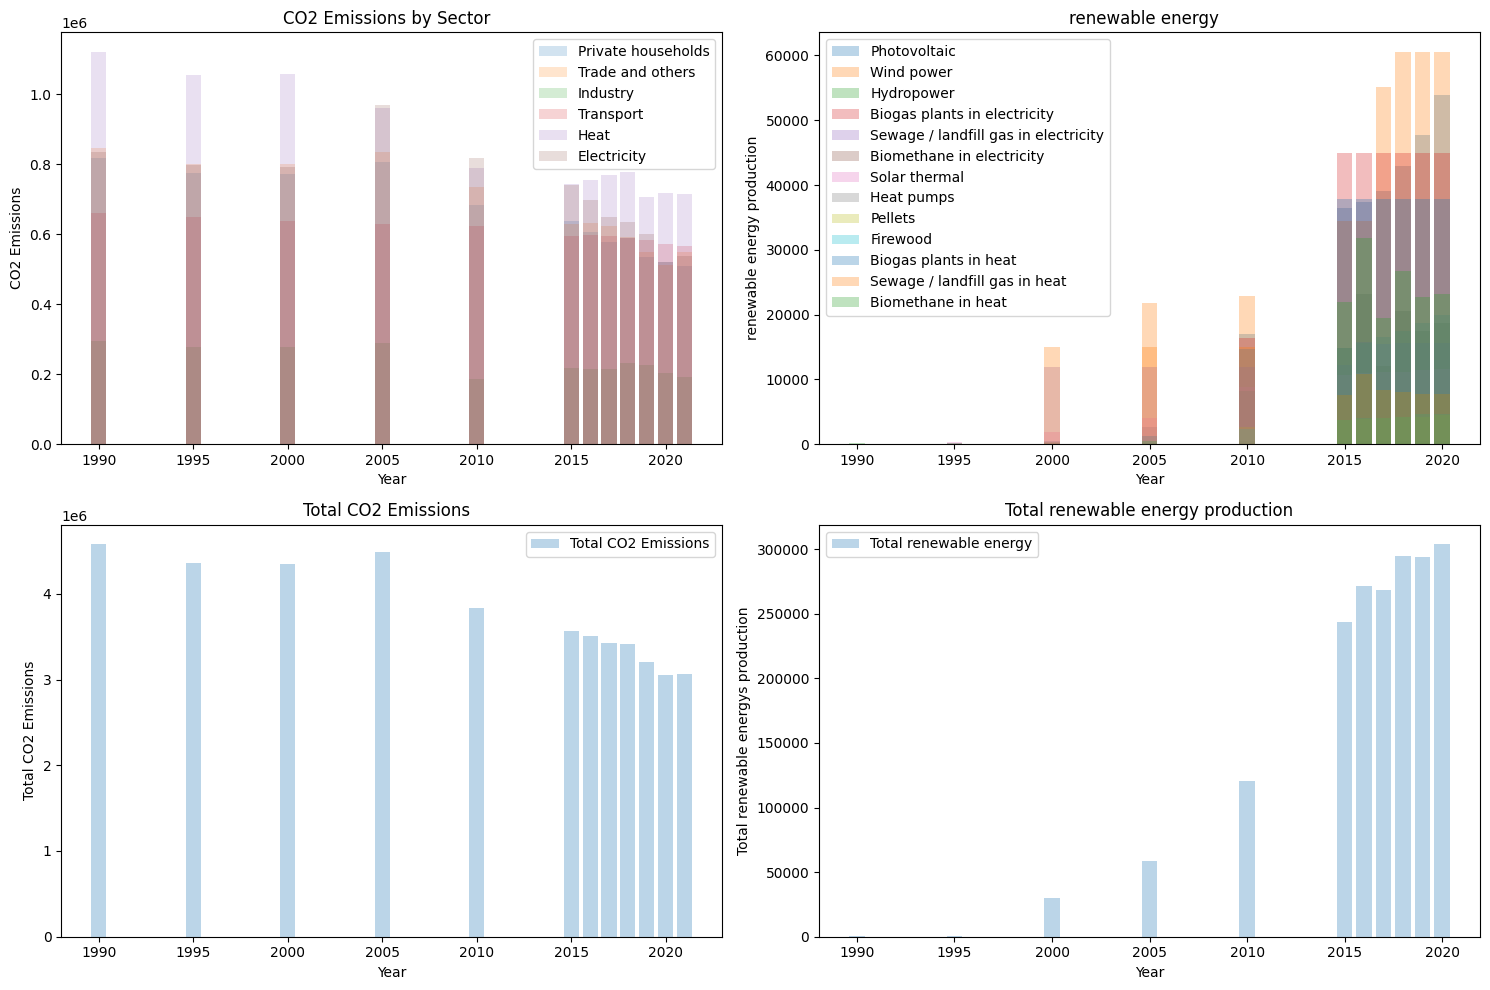

In [16]:
### plot all 

# The columns to plot 
co2_emissions_clms_to_plot =  ['Private households', 'Trade and others', 'Industry','Transport', 'Heat', 'Electricity']

renewable_energy_clms_to_plot = ['Photovoltaic', 'Wind power', 'Hydropower',
       'Biogas plants in electricity', 'Sewage / landfill gas in electricity',
       'Biomethane in electricity' , 'Solar thermal',
       'Heat pumps', 'Pellets', 'Firewood', 'Biogas plants in heat',
       'Sewage / landfill gas in heat', 'Biomethane in heat']

 

# 
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot for co2   
for idx, sector in enumerate(co2_emissions_clms_to_plot):
    axs[0, 0].bar(co2_emissions['year'], co2_emissions[sector], label=sector,   alpha=0.2)

axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('CO2 Emissions')
axs[0, 0].set_title(f'CO2 Emissions by Sector  ')
axs[0, 0].legend()


# Plot for renwable 
for idx, sector in enumerate(renewable_energy_clms_to_plot):
    axs[0, 1].bar(renewable_energy['year'], renewable_energy[sector], label=sector, alpha=0.3)

axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('renewable energy production')
axs[0, 1].set_title(f'renewable energy  ')
axs[0, 1].legend()

# Plot Total CO2 Emissions
axs[1, 0].bar(co2_emissions['year'], co2_emissions['Total_co2'], label='Total CO2 Emissions', alpha=0.3)

axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Total CO2 Emissions')
axs[1, 0].set_title(f'Total CO2 Emissions  ')
axs[1, 0].legend()

# Plot for Total renewable energys
axs[1, 1].bar(renewable_energy['year'], renewable_energy['Total RE production'], label='Total renewable energy', alpha=0.3)

axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Total renewable energys production')
axs[1, 1].set_title(f'Total renewable energy production')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


As shown in the graph, there is a significant increase in renewable energy production over the years espesiaally, windpower and hydropower indicating a growing reliance on these renewable sources. Biomethane in electricity and solar thermal also show an increasing trend. The total renewable energy production has substantially increased from 1990 to 2020. . In 1990, renewable energy production in electricity was just 303.00000 MWh, while in 2020 it was 194175.72000 MWh. Renewable energy production in heat has also increased dramatically, from 67.81 MWh in 1990 to 109422.43400 MWh in 2020.

On the other hand, There's a noticeable decrease in total CO2 emissions from 1990 to 2020, indicated by the negative values in the "Total as of 1990" column. The "Total_co2" column represents the total CO2 emissions from all sectors, and it also shows a decreasing trend.

While the transport sector has seen the largest decrease in CO2 emissions, followed by the electricity sector, there is still room for improvement in the private households and industry sectors. Here are some potential strategies for reducing CO2 emissions from private households and industry:
Promoting energy efficiency in buildings.  Also, encouraging the use of renewable energy sources 
Promoting public transportation and cycling. in addition, switching to renewable energy sources. 

The increase in renewable energy production aligns with efforts to reduce CO2 emissions, as evidenced by the decreasing trend in total CO2 emissions. Government policies, must made it more attractive for businesses to invest in renewable energy. Also, technological advancements should make renewable energy more affordable and efficient. In addition, it is really important to get the public support and raise the awareness of the environmental benefits of these sources.

Next, the heat map represents the CO2 Emissions by Sector and Energy Source in 2021:

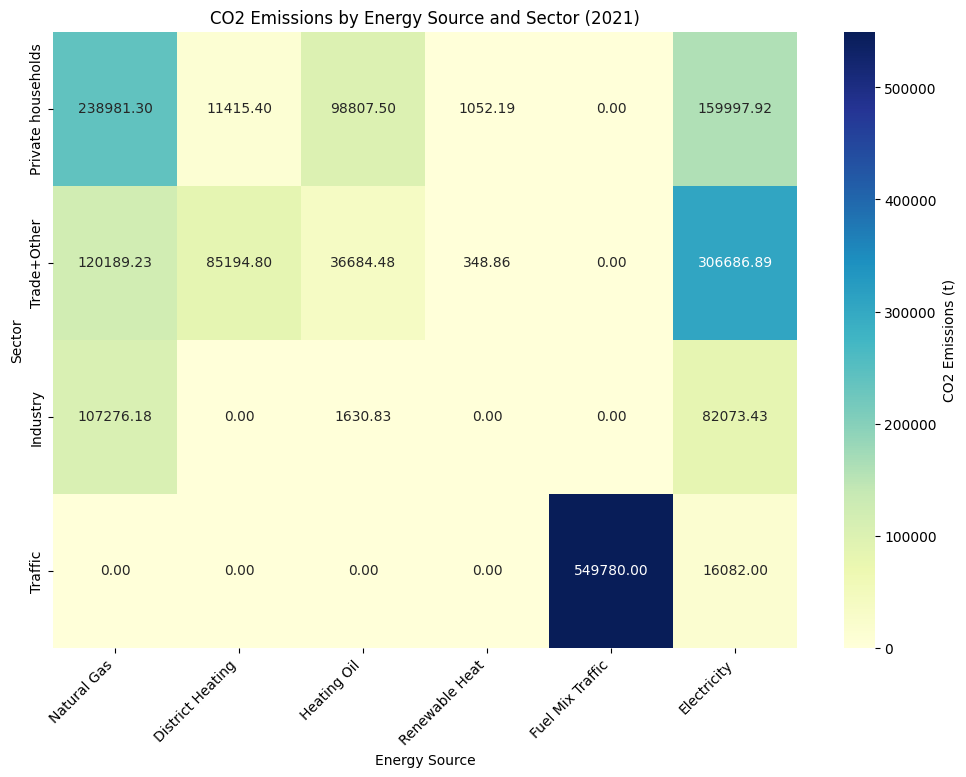

In [22]:
###plot heat map
 
# Select relevant rows and columns for the heatmap
data_to_heatmap = co2_by_energy_source.iloc[0:4, 0:-2]  # Select rows 0 to 3 and columns 1 to -2 (excluding the last column)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_to_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'CO2 Emissions (t)'})

# Set labels and title
plt.title('CO2 Emissions by Energy Source and Sector (2021)')
plt.xlabel('Energy Source')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment as needed
plt.ylabel('Sector')

# Show the plot
plt.show()



**Private households** sector contributes a high share of CO2 emissions (28%). The major sources include natural gas, district heating, heating oil, and electricity. After that, **trade** with (30.2%). Similar to private households, it shows significant emissions from natural gas, district heating, heating oil, and electricity. Then, **Industry** contributes 10.5% of total CO2 emissions. The primary sources are natural gas and electricity. Finally, The **traffic** sector includes fuel mix traffic and electricity, accounts for 31.2% of CO2 emissions. Notably, it has the highest share.



Regarding CO2 Emissions by Energy Source,  **Natural Gas** contributes a significant amount (25.7% of total emissions), with major contributions from private households, trade, and industry. After that, **District Heating** represents 5.3% of total emissions, mainly from private households and trade. Then, **Heating Oil** contributes 7.6%, primarily from private households and trade. Besides that, **Renewable Heat** is the  minimal contributor, mainly from private households. In addition, **Fuel Mix Traffic** is a considerable contributor with(30.3%), primarily from the traffic sector. Finally, **Electricity** represents 31.1%, with substantial contributions from all of the sectors.

## 4. Conclusion: 


This report has demonstrated the power of data engineering to shed light on renewable energy production and CO2 emissions trends. 

It highlights the need for continued monitoring and implementation of policies that encourage cleaner energy sources and sustainable practices. It is also recommended to explore opportunities for further improvements in sectors showing slower declines, such as private households, trade+other, and traffic.

The correlation between renewable energy growth and CO2 emission reduction is a strong testament to the role of renewables in decarbonizing cities. As Münster continues to expand its renewable energy portfolio, CO2 emissions are likely to further decrease, contributing to a healthier environment for its residents.
 
In future work, time series analysis could be utilized to analyse the relationship between renewable energy production and its impact on CO2 emission patterns. This approach will further enhance the ability to make informed decisions and accelerate the transition to a sustainable future.

By combining data-driven insights with proactive policy measures and collaborative efforts, the challenges of CO2 emissions could be addressed effectively.

## Refrences: 

* https://www.alt-bau-neu.de/kreis-borken/abnwaermepumpen-29087.asp  

* https://www.swd-ag.de/magazin/wasserkraft/ 

* https://www.stadt-muenster.de/klima/foerderprogramm/photovoltaik

* https://farwick-muehlenbau.de/biogasanlagen-unser-beitrag-zu-erneuerbaren-energien/

* https://www.plenter.ms/shk/heizung/heizsysteme/kamine-oefen/brennstoffe/pellets

* https://www.heizungsbau.net/magazin/scheitholzheizung-20204393 
 
* https://climatefalsesolutions.org/landfill-gas-to-energy/  

* https://www.swd-ag.de/magazin/wasserkraft/   

* https://orsted.de/gruene-energie/energie-lexikon/co2-emissionen

* https://www.energy.gov/eere/renewable-energy

* https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm

